In [1]:
from tfnbs.pairwise_tfns import compute_p_val, compute_t_stat_diff, compute_t_stat_tfnos_diffs
import time
from tfnbs.utils import fisher_r_to_z

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
path_to_data = './02_BLOCK_VAR_HRF_SNR05_CORRDIFF/'

In [3]:
ground_true = loadmat(path_to_data+'ground_truth_symm_matrix.mat')['ground_truth']

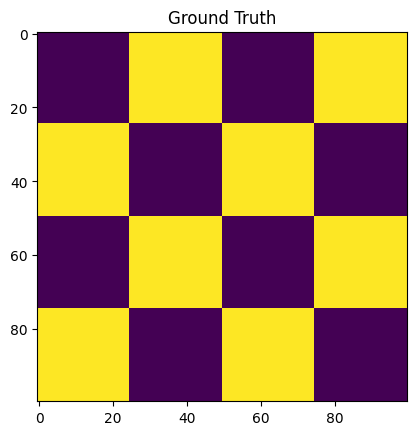

In [4]:
plt.imshow(ground_true); plt.title('Ground Truth');

In [5]:
 # what we have with other methods
 FdrAB = loadmat(path_to_data+'Task_A_vs_B_FDR05.mat')['thresholded']
 FdrBA = loadmat(path_to_data+'Task_B_vs_A_FDR05.mat')['thresholded']


In [6]:
def plot_2_matrix(mat1, mat2, title1, title2, cmap = 'viridis'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
    axes[0].imshow(mat1, cmap=cmap)  # Use imshow to display the matrix as an image
    axes[0].set_title(title1); axes[0].axis('off')  
    im2 = axes[1].imshow(mat2, cmap=cmap)
    axes[1].set_title(title2); axes[1].axis('off')
    #fig.colorbar(im1, ax=axes[1])
    fig.tight_layout()
    

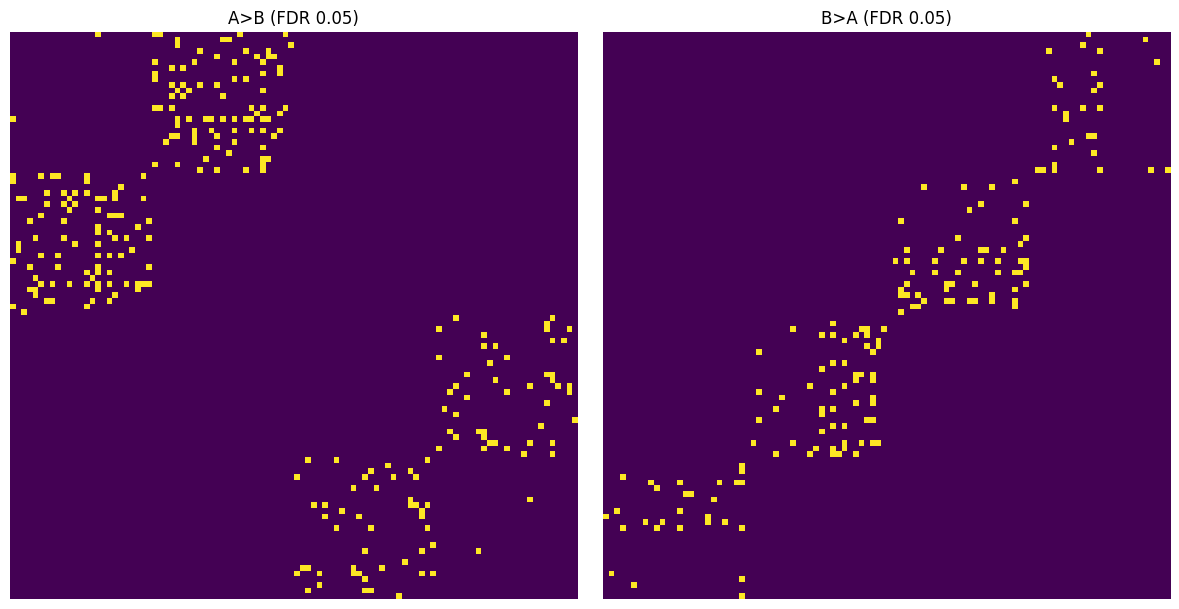

In [7]:
title1, title2 = "A>B (FDR 0.05)", "B>A (FDR 0.05)"
plot_2_matrix(FdrAB, FdrBA, title1, title2)


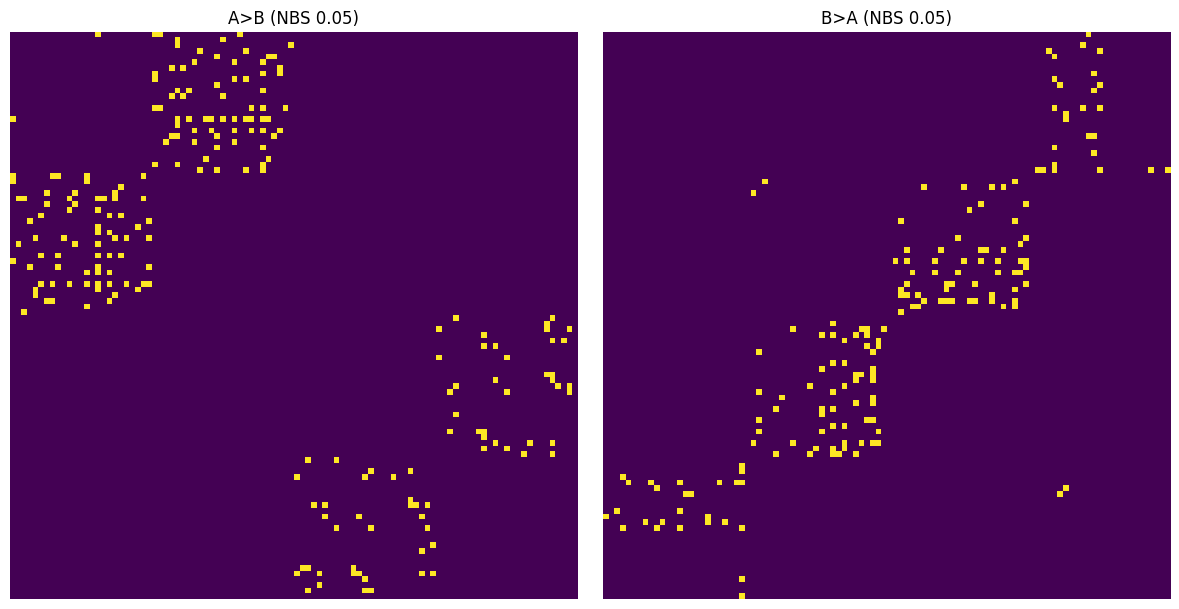

In [8]:
 # what we have with other methods
NBS_AB = loadmat(path_to_data+'Task_A_vs_B_NBS_FWEextent_05.mat')['thresholded']
NBS_BA = loadmat(path_to_data+'Task_B_vs_A_NBS_FWEextent_05.mat')['thresholded']
title1, title2 = "A>B (NBS 0.05)", "B>A (NBS 0.05)"
plot_2_matrix(NBS_AB, NBS_BA, title1, title2)

## NBS with bctpy 
Python package replication of matlab version (controlled copy on matlab network based statisics)
bctpy is a direct translation of matlab code to python. (https://github.com/aestrivex/bctpy/tree/master)

But, it takes time, so I make only 100 iteration

import bct

In [9]:
import bct

In [10]:
def prepare_group(arr, swap_axis=True):
    arr = np.nan_to_num(arr, posinf=0, neginf=0)
    arr = fisher_r_to_z(arr)
    if swap_axis:
        arr  = arr.swapaxes(0, 2)
    return arr

In [11]:
taskA = prepare_group(loadmat(path_to_data+'Task_A.mat')['corrdiff_TaskA'], swap_axis=False)
taskB = prepare_group(loadmat(path_to_data+'Task_B.mat')['corrdiff_TaskB'], swap_axis=False)

In [12]:
%%time
thres = 2.1
pvals_BA, adj_BA, _ = bct.nbs_bct(taskA, taskB, thres, k=100, paired=True, tail='left', verbose=False)
pvals_AB, adj_AB, _ = bct.nbs_bct(taskA, taskB, thres, k=100, paired=True, tail='right', verbose=False)


max component size is 451
estimating null distribution with 100 permutations
permutation 0 of 100.  p-value so far is 0.000
permutation 10 of 100.  p-value so far is 0.000
permutation 20 of 100.  p-value so far is 0.000
permutation 30 of 100.  p-value so far is 0.000
permutation 40 of 100.  p-value so far is 0.000
permutation 50 of 100.  p-value so far is 0.000
permutation 60 of 100.  p-value so far is 0.000
permutation 70 of 100.  p-value so far is 0.000
permutation 80 of 100.  p-value so far is 0.000
permutation 90 of 100.  p-value so far is 0.000
permutation 99 of 100.  p-value so far is 0.000
max component size is 546
estimating null distribution with 100 permutations
permutation 0 of 100.  p-value so far is 0.000
permutation 10 of 100.  p-value so far is 0.000
permutation 20 of 100.  p-value so far is 0.000
permutation 30 of 100.  p-value so far is 0.000
permutation 40 of 100.  p-value so far is 0.000
permutation 50 of 100.  p-value so far is 0.000
permutation 60 of 100.  p-value 

p_val B> A [0.] p_val A>B [0.]


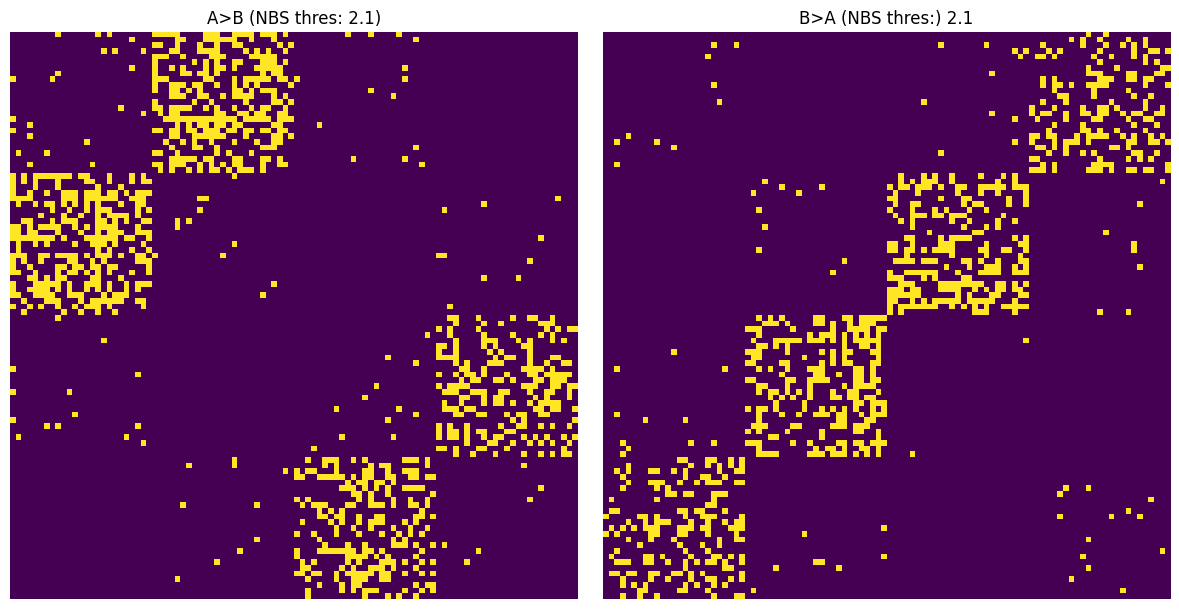

In [13]:
print("p_val B> A", pvals_BA, "p_val A>B", pvals_AB)
title1, title2 = f"A>B (NBS thres: {thres})", f"B>A (NBS thres:) {thres}"
plot_2_matrix(adj_AB, adj_BA, title1, title2)

In [14]:
%%time
thres = 2.75
pvals_BA, adj_BA, _ = bct.nbs_bct(taskA, taskB, thres, k=100, paired=True, tail='left', verbose=False)
pvals_AB, adj_AB, _ = bct.nbs_bct(taskA, taskB, thres, k=100, paired=True, tail='right', verbose=False)

max component size is 182
estimating null distribution with 100 permutations
permutation 0 of 100.  p-value so far is 0.000
permutation 10 of 100.  p-value so far is 0.000
permutation 20 of 100.  p-value so far is 0.000
permutation 30 of 100.  p-value so far is 0.000
permutation 40 of 100.  p-value so far is 0.000
permutation 50 of 100.  p-value so far is 0.000
permutation 60 of 100.  p-value so far is 0.000
permutation 70 of 100.  p-value so far is 0.000
permutation 80 of 100.  p-value so far is 0.000
permutation 90 of 100.  p-value so far is 0.000
permutation 99 of 100.  p-value so far is 0.000
max component size is 215
estimating null distribution with 100 permutations
permutation 0 of 100.  p-value so far is 0.000
permutation 10 of 100.  p-value so far is 0.000
permutation 20 of 100.  p-value so far is 0.000
permutation 30 of 100.  p-value so far is 0.000
permutation 40 of 100.  p-value so far is 0.000
permutation 50 of 100.  p-value so far is 0.000
permutation 60 of 100.  p-value 

p_val B> A [0.] p_val A>B [0. 1.]


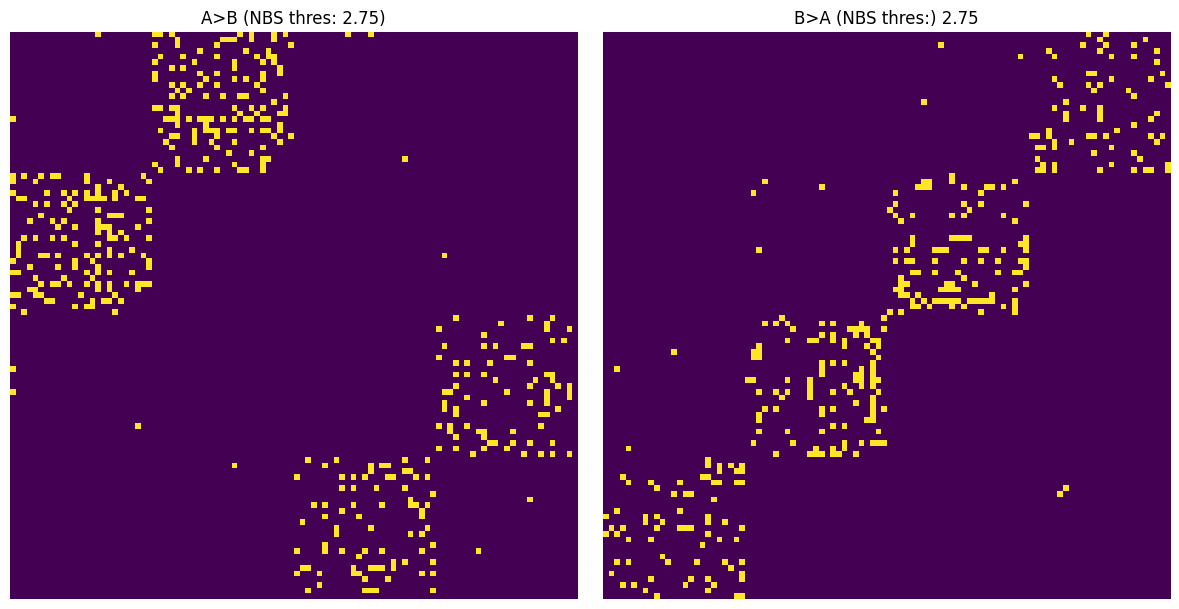

In [15]:
print("p_val B> A", pvals_BA, "p_val A>B", pvals_AB)
title1, title2 = f"A>B (NBS thres: {thres})", f"B>A (NBS thres:) {thres}"
plot_2_matrix(adj_AB==1, adj_BA, title1, title2)

## TFNOS comparison

python implementation (our) version of tf approach [Statistical inference in brain graphs using threshold-free network-based statistics](https://onlinelibrary.wiley.com/doi/full/10.1002/hbm.24007)

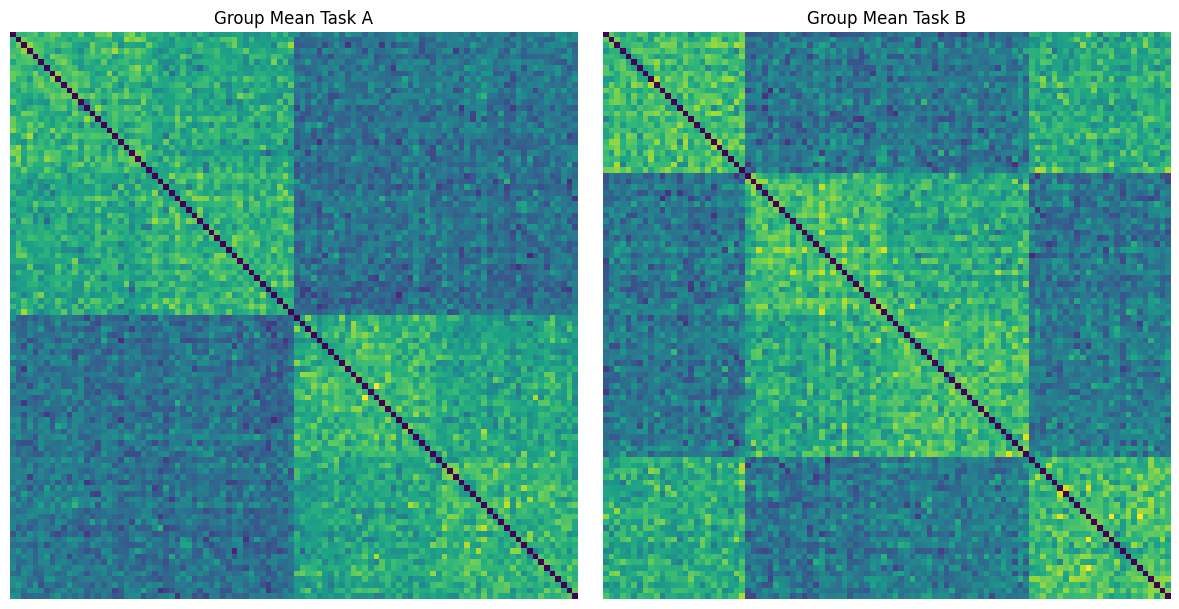

In [16]:
taskA = prepare_group(loadmat(path_to_data+'Task_A.mat')['corrdiff_TaskA'], swap_axis=True)
taskB = prepare_group(loadmat(path_to_data+'Task_B.mat')['corrdiff_TaskB'], swap_axis=True)
title1, title2 = "Group Mean Task A", "Group Mean Task B"
plot_2_matrix(taskA.mean(axis=0), taskB.mean(axis=0), title1, title2, cmap = 'viridis')


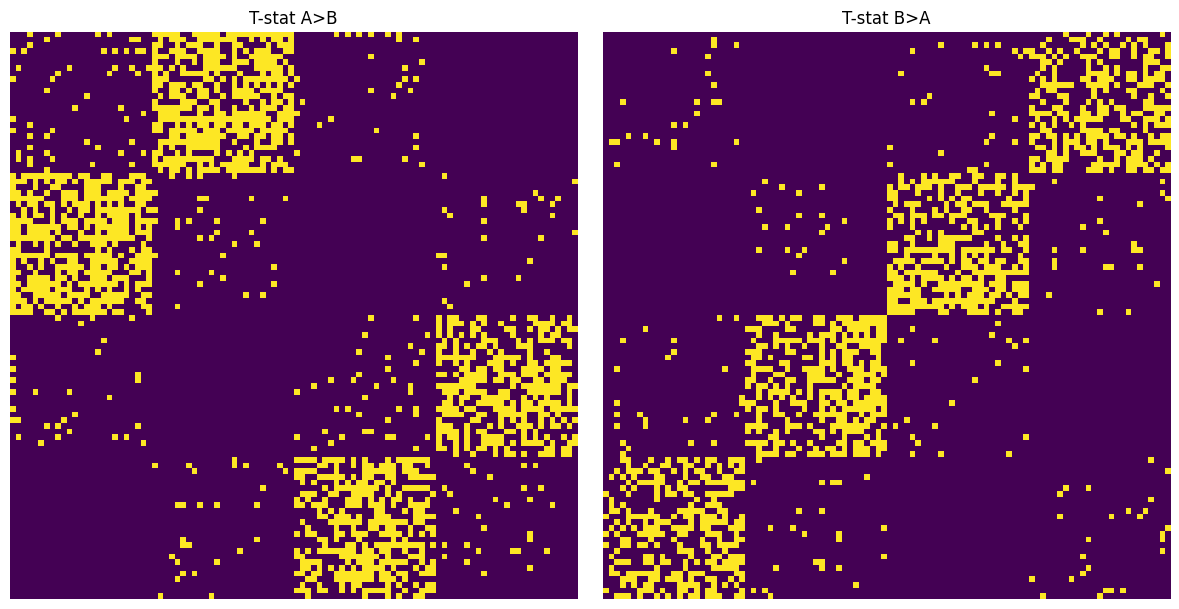

In [17]:
t_stat = compute_t_stat_diff(taskA- taskB)
title1, title2 = "T-stat A>B", "T-stat B>A"
plot_2_matrix(t_stat['g2>g1']>1.65, t_stat['g1>g2']>1.65, title1, title2, cmap = 'viridis')


CPU times: user 91.5 ms, sys: 9.38 ms, total: 101 ms
Wall time: 101 ms


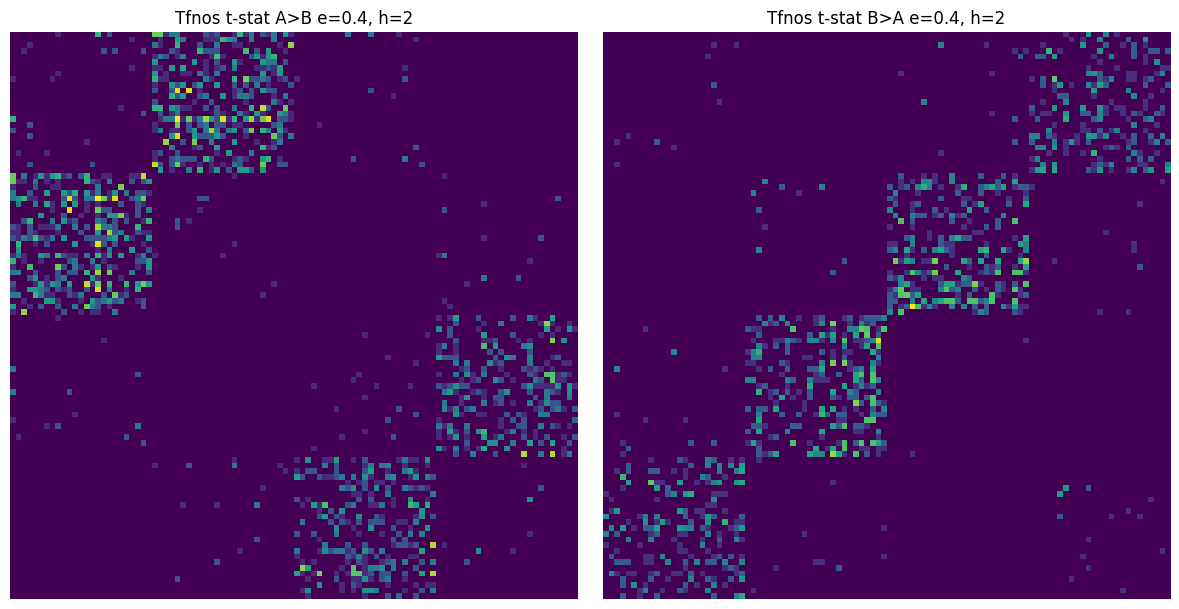

In [18]:
%%time
e, h = 0.4, 2
t_stat_tfnos = compute_t_stat_tfnos_diffs(taskA- taskB, e=e, h=h, n=10, start_thres=1.7)
title1, title2 = f"Tfnos t-stat A>B e={e}, h={h}", f"Tfnos t-stat B>A e={e}, h={h}"
plot_2_matrix(t_stat_tfnos['g2>g1'], t_stat_tfnos['g1>g2'], title1, title2, cmap = 'viridis')

In [19]:
%%time
p_vals_orig = compute_p_val(taskB, 
                            taskA,
                            n_permutations=1000, 
                            paired=True, 
                            tf=False, 
                            use_mp=True)

CPU times: user 950 ms, sys: 809 ms, total: 1.76 s
Wall time: 6.51 s


In [20]:
p_vals_orig.keys()

dict_keys(['g2>g1', 'g1>g2'])

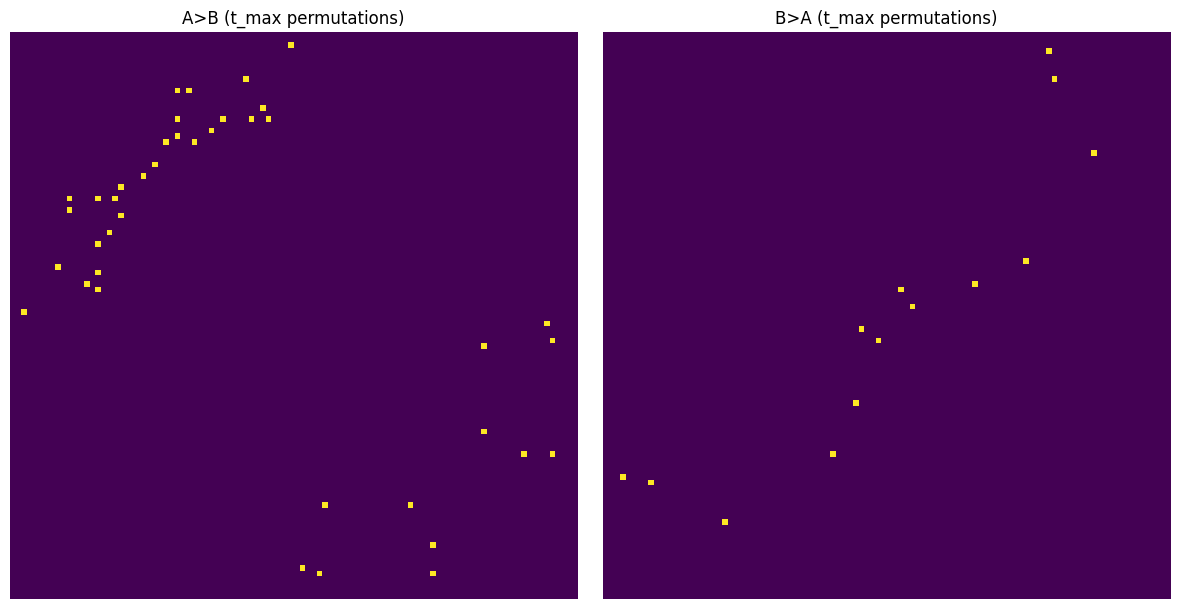

In [21]:
title1, title2 = "A>B (t_max permutations)", "B>A (t_max permutations)"
plot_2_matrix(p_vals_orig['g2>g1']<0.1, p_vals_orig['g1>g2']<0.1, title1, title2, cmap = 'viridis')


## Results
Depends on parameters, but quite stable, results very close and close to ground true and other methods, but to much faster, bigger h, lower e - more conservative

In [22]:
%%time
p_vals_tf = compute_p_val(taskB, 
                            taskA,
                            n_permutations=1000, 
                            paired=True, 
                            tf=True, 
                            use_mp=True,
                            e=[0.25, 0.25, 0.4, 0.4, 0.7, 0.7], 
                            h=[1, 3, 1, 3 , 1, 3],
                            n=15)

CPU times: user 1.37 s, sys: 587 ms, total: 1.96 s
Wall time: 15.8 s


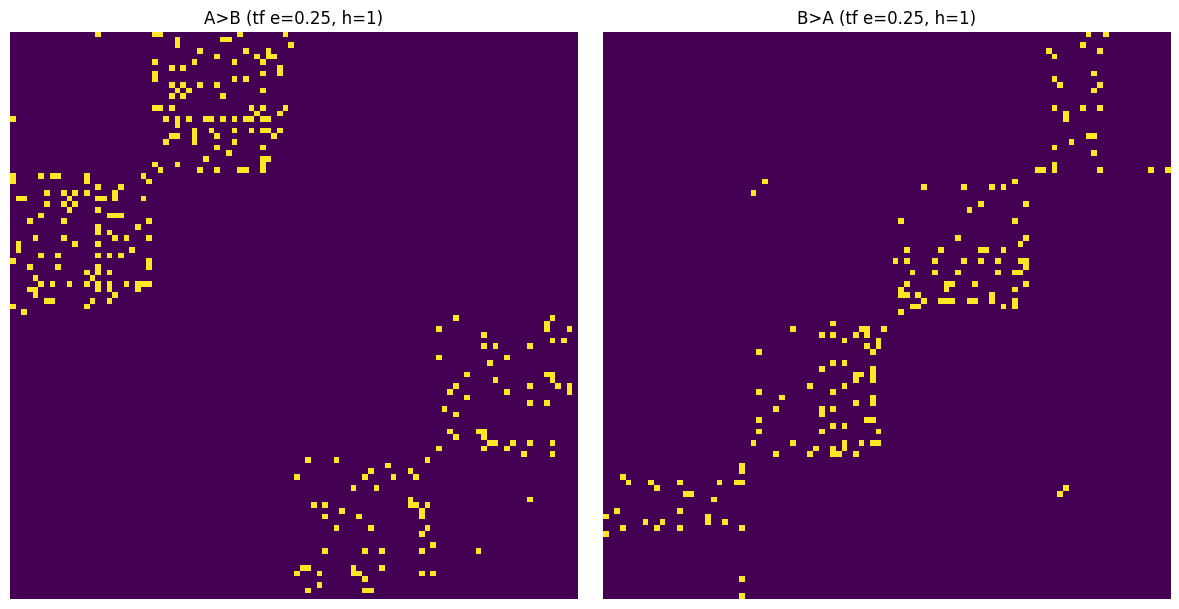

In [23]:
e, h = 0.25, 1
title1, title2 = f"A>B (tf e={e}, h={h})", f"B>A (tf e={e}, h={h})"
plot_2_matrix(p_vals_tf['g2>g1'][...,0]<0.05, p_vals_tf['g1>g2'][...,0]<0.05, title1, title2, cmap = 'viridis')


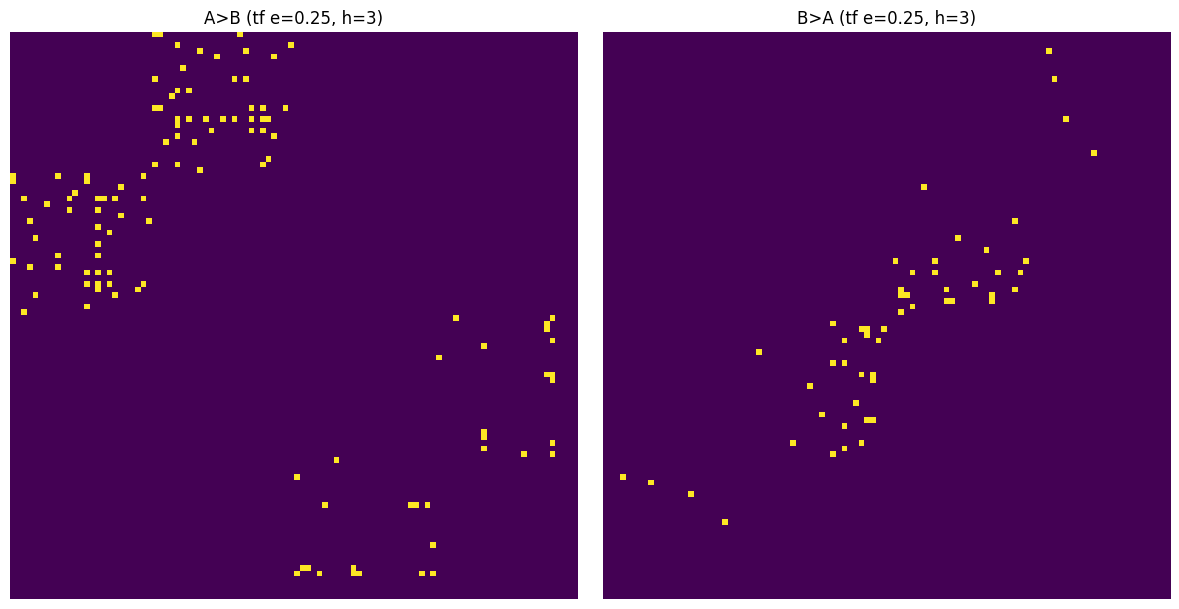

In [24]:
e, h = 0.25, 3
title1, title2 = f"A>B (tf e={e}, h={h})", f"B>A (tf e={e}, h={h})"
plot_2_matrix(p_vals_tf['g2>g1'][...,1]<0.05, p_vals_tf['g1>g2'][...,1]<0.05, title1, title2, cmap = 'viridis')

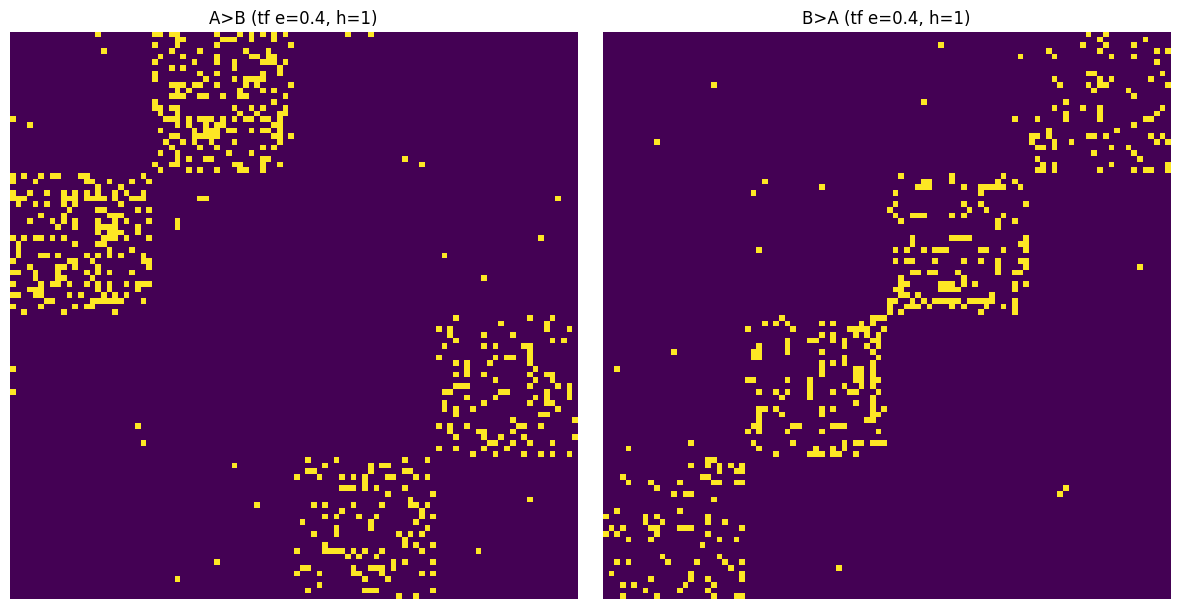

In [25]:
e, h = 0.4, 1
title1, title2 = f"A>B (tf e={e}, h={h})", f"B>A (tf e={e}, h={h})"
plot_2_matrix(p_vals_tf['g2>g1'][...,2]<0.05, p_vals_tf['g1>g2'][...,2]<0.05, title1, title2, cmap = 'viridis')

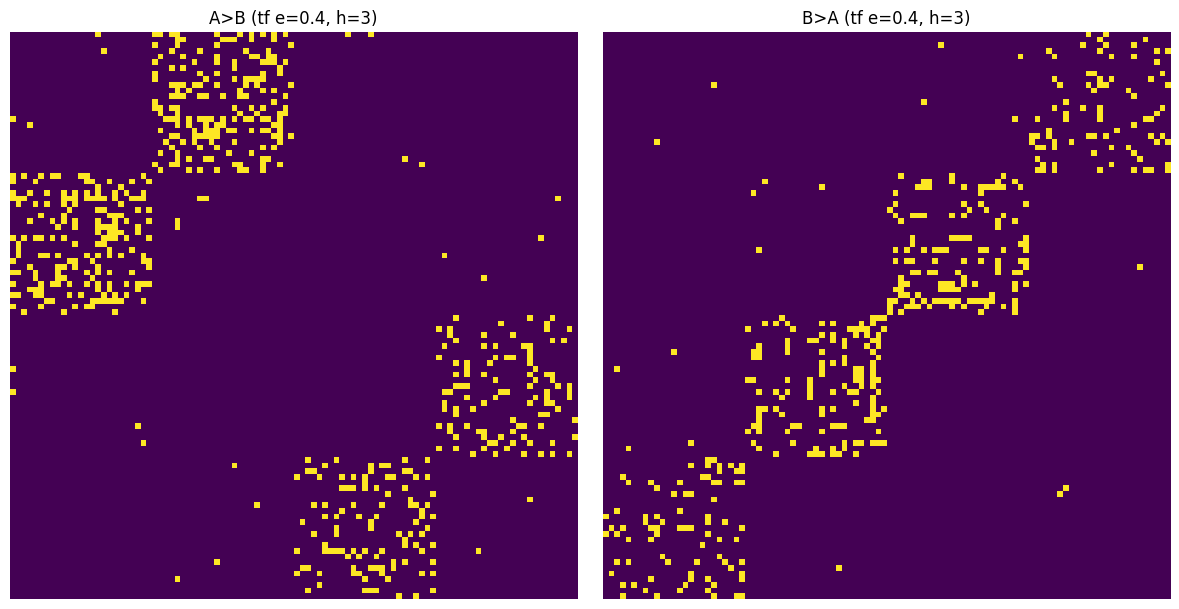

In [26]:
e, h = 0.4, 3
title1, title2 = f"A>B (tf e={e}, h={h})", f"B>A (tf e={e}, h={h})"
plot_2_matrix(p_vals_tf['g2>g1'][...,2]<0.05, p_vals_tf['g1>g2'][...,2]<0.05, title1, title2, cmap = 'viridis')

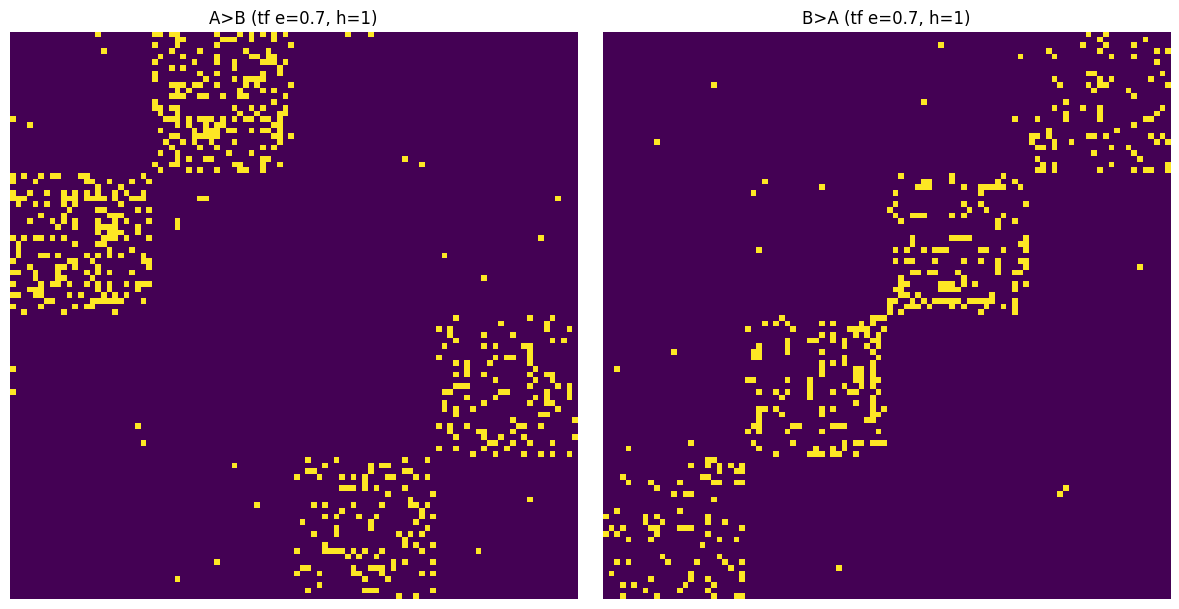

In [27]:
e, h = 0.7, 1
title1, title2 = f"A>B (tf e={e}, h={h})", f"B>A (tf e={e}, h={h})"
plot_2_matrix(p_vals_tf['g2>g1'][...,2]<0.05, p_vals_tf['g1>g2'][...,2]<0.05, title1, title2, cmap = 'viridis')

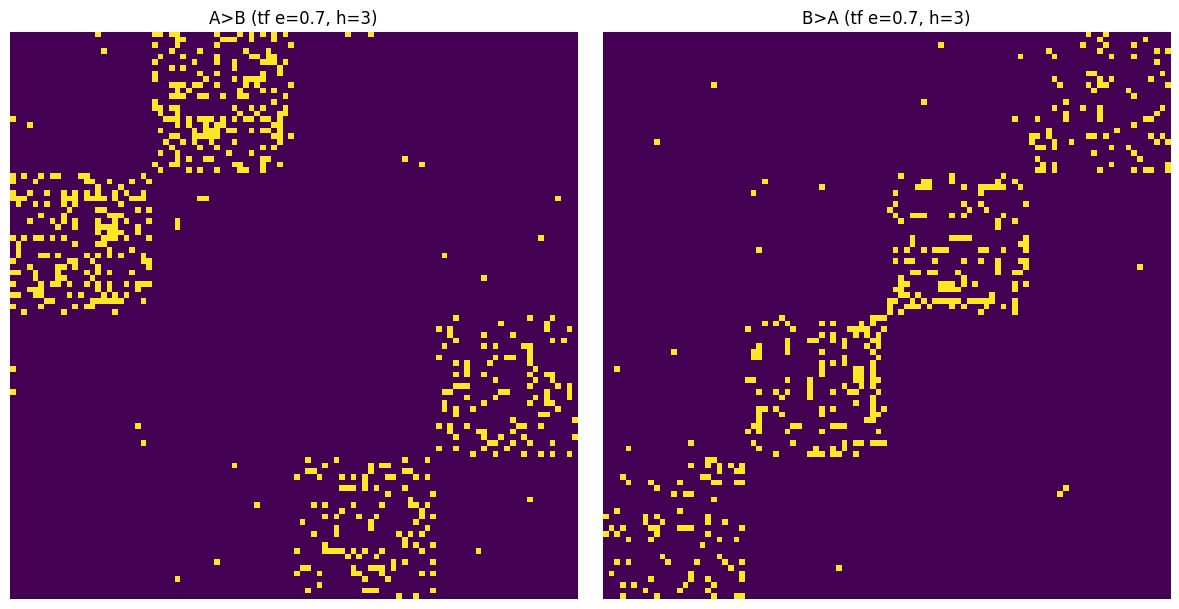

In [28]:
e, h = 0.7, 3
title1, title2 = f"A>B (tf e={e}, h={h})", f"B>A (tf e={e}, h={h})"
plot_2_matrix(p_vals_tf['g2>g1'][...,2]<0.05, p_vals_tf['g1>g2'][...,2]<0.05, title1, title2, cmap = 'viridis')